Training with optimizer: Adam


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5841 - loss: 1.4773
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8945 - loss: 0.3792
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9203 - loss: 0.2811
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9305 - loss: 0.2465
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9440 - loss: 0.2068
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9480 - loss: 0.1885
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9551 - loss: 0.1625
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9562 - loss: 0.1542
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9605 - loss: 0.1437
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9655 - loss: 0.1271
Training with optimizer: AdaDelta
Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6208 - loss: 1.3414
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s

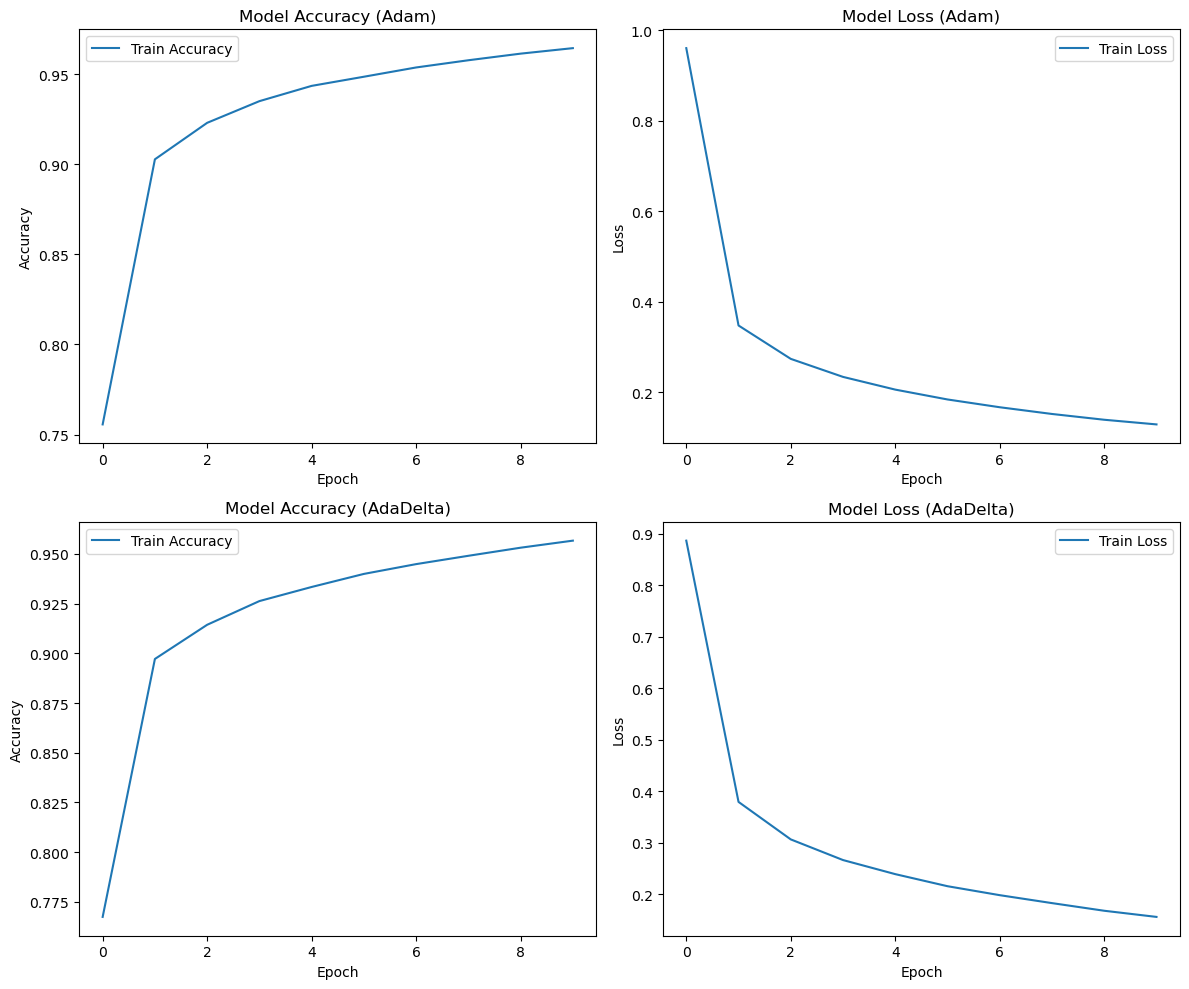

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

train_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\train.csv"
test_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

x_train = train_df.drop(columns=['label']).values / 255.0
y_train = train_df['label'].values

if 'label' in test_df.columns:
    x_test = test_df.drop(columns=['label']).values / 255.0
    y_test = test_df['label'].values
    has_labels = True
else:
    x_test = test_df.values / 255.0
    y_test = None
    has_labels = False

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

def train_with_optimizer(optimizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=10, batch_size=1000, validation_data=(x_test, y_test) if has_labels else None)
    return history

optimizers = {
    'Adam': keras.optimizers.Adam(learning_rate=0.001),
    'AdaDelta': keras.optimizers.Adadelta(learning_rate=1.0)
}

histories = {}
for opt_name, opt in optimizers.items():
    print(f"Training with optimizer: {opt_name}")
    histories[opt_name] = train_with_optimizer(opt)

plt.figure(figsize=(12, 10))

for i, (opt_name, history) in enumerate(histories.items(), 1):
    
    plt.subplot(len(optimizers), 2, 2*i-1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if has_labels:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Model Accuracy ({opt_name})')
    
    plt.subplot(len(optimizers), 2, 2*i)
    plt.plot(history.history['loss'], label='Train Loss')
    if has_labels:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Model Loss ({opt_name})')

plt.tight_layout()
plt.show()
